# Classical Electrodynamics - Problem Set 6

## Dimitris Kourtesis - Subatomic Physics Masters

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from rcparams import rcparams
mpl.rcParams.update(rcparams)

from scipy.special import legendre
from scipy.special import j0

# Laplace’s Equation in Spherical Coordinates (Azimuthal Symmetry)

For systems with **azimuthal symmetry** (no dependence on the azimuthal angle $\phi$), the Laplace equation in spherical coordinates admits solutions of the form

$$
\Phi(r,\theta) = \sum_{\ell=0}^{\infty}
\left( A_\ell r^\ell + B_\ell r^{-(\ell+1)} \right)
P_\ell(\cos\theta),
$$

where $P_\ell(\cos\theta)$ are the **Legendre polynomials**, $\ell$ is a **non-negative integer**, and $A_\ell$, $B_\ell$ are constants determined by boundary conditions.

If we keep only the **decaying radial behavior**, the solution simplifies to

$$
\Phi_\ell(r,\theta) = \frac{1}{r^{\ell+1}}\, P_\ell(\cos\theta).
$$

---

# Plots to Generate

We will visualize the structure of these solutions by producing:

1. **1D plots** of the first few **Legendre polynomials**  
   $P_0(\cos\theta)$, $P_1(\cos\theta)$, $P_2(\cos\theta)$, $P_3(\cos\theta)$

2. **2D contour plots** of $\Phi_\ell(r,\theta)$ in the **$xz$-plane** ($\phi=0$)

3. **2D heatmaps** of the same potential

4. **3D surface plots** of $\Phi_\ell(r,\theta)$ using  
   $x = r \sin\theta$, $\; z = r \cos\theta$

These visualizations illustrate how different $\ell$ modes shape the angular dependence and radial decay of solutions to Laplace’s equation.


In [2]:
def plot_legendre(ells=(0,1,2,3,4), palette="tab10", figsize=(7,5)):

    x = np.linspace(-1, 1, 400)

    # pick colors
    cmap = plt.get_cmap(palette)
    colors = [cmap(i) for i in range(len(ells))]

    fig, ax = plt.subplots(figsize=figsize)

    for i, ell in enumerate(ells):
        P = np.polynomial.legendre.Legendre.basis(ell)(x)
        ax.plot(x, P, color=colors[i])

        # ===== Smart label placement =====
        dPdx = np.gradient(P, x)
        idx = np.argmin(np.abs(dPdx))   # flattest point

        ax.text(
            x[idx], P[idx],
            f"$P_{ell}$",
            fontsize=11,
            color=colors[i],
            ha="left",
            va="center",
            bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1.5)
        )

    ax.set_title("Legendre Polynomials $P_\\ell(x)$")
    ax.set_xlabel("x")
    ax.set_ylabel("$P_\\ell(x)$")
    plt.tight_layout()

    return fig, ax

In [3]:
def plot_contour_heatmap(ell, cmap="viridis", r_max=1, Nr=300, Nt=300):
    # grid
    r = np.linspace(0.2, r_max, Nr)     # avoid r=0 singularity
    theta = np.linspace(0, np.pi, Nt)
    R, T = np.meshgrid(r, theta)

    # Cartesian (phi = 0)
    X = R * np.sin(T)
    Z = R * np.cos(T)

    # potential
    P = legendre(ell)
    Phi = R**(-(ell+1)) * P(np.cos(T))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"width_ratios": [2, 1]})

    # --- Contour ---
    cs = axes[0].contour(X, Z, Phi, levels=20, cmap=cmap)
    axes[0].clabel(cs, inline=True, fontsize=8)
    axes[0].set_title(f"Contour: $\\Phi_{ell}$")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("z")

    # --- Heatmap ---
    im = axes[1].imshow(Phi.T, extent=[X.min(), X.max(), Z.min(), Z.max()],
                    origin='lower', aspect='equal',
                    cmap=cmap)
    axes[1].set_title(f"Heatmap: $\\Phi_{ell}$")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("z")

    return fig, axes

In [4]:
def plot_surface_pair(ell1=1, ell2=2, r_max=1, Nr=200, Nt=200):
    # grid
    r = np.linspace(0.2, r_max, Nr)
    theta = np.linspace(0, np.pi, Nt)
    R, T = np.meshgrid(r, theta)

    # Cartesian (phi = 0)
    X = R * np.sin(T)
    Z = R * np.cos(T)
    Y = np.zeros_like(X)   # 2D slice embedded in 3D

    fig = plt.figure(figsize=(12, 5))

    for i, ell in enumerate([ell1, ell2], start=1):
        ax = fig.add_subplot(1, 2, i, projection="3d")
        P = legendre(ell)
        Phi = R**(-(ell+1)) * P(np.cos(T))

        ax.plot_surface(X, Z, Phi, rstride=4, cstride=4, linewidth=0, cmap="viridis")
        ax.set_title(rf"$\Phi$ surface plot for $\ell = {ell}$")
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.set_zlabel(r"$\Phi_\ell$")
        ax.view_init(elev=30, azim=-60)

    fig.tight_layout()
    return fig, fig.axes

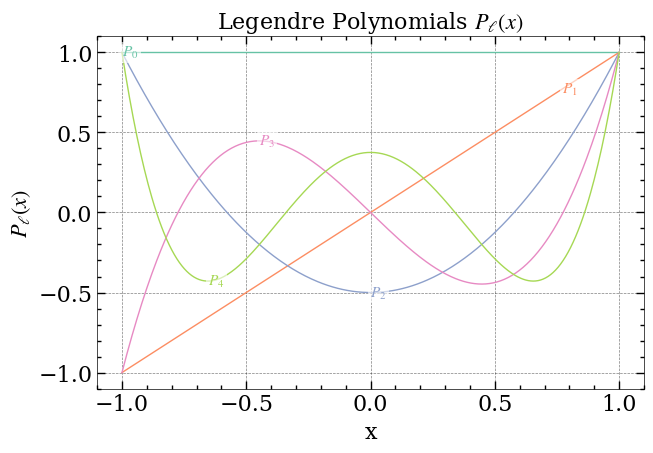

In [5]:
fig, ax = plot_legendre(palette="Set2")
fig.savefig("polynomials.png")
plt.show()

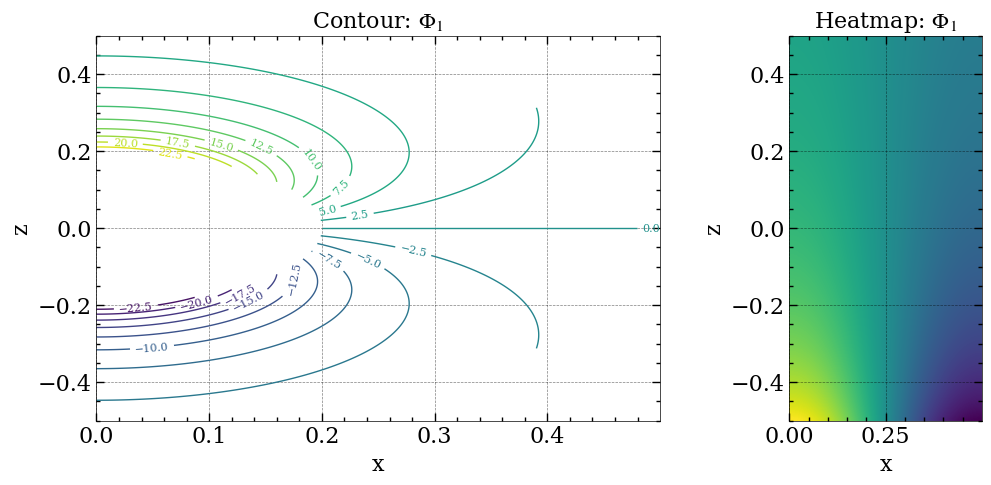

In [6]:
fig, axs = plot_contour_heatmap(1, r_max=0.5)
fig.savefig("contours - l1.png")
plt.show()

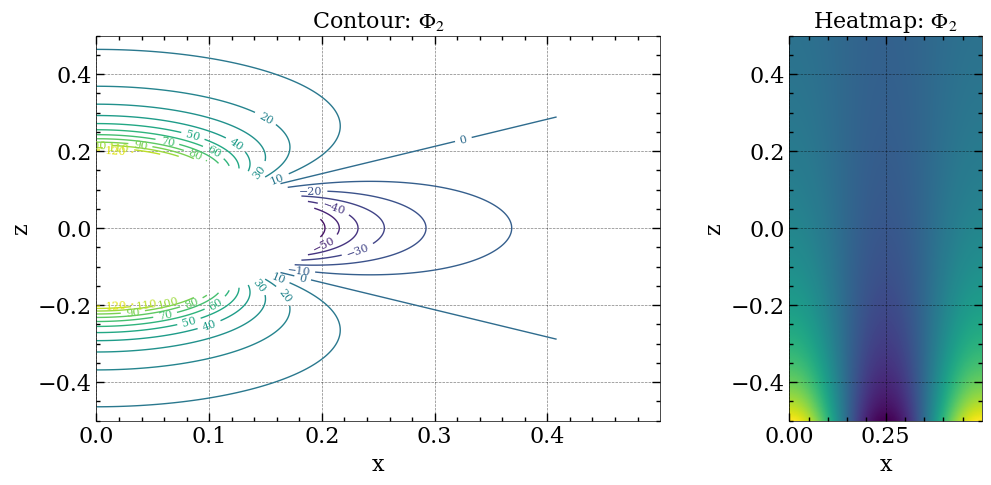

In [7]:
fig, axs = plot_contour_heatmap(2, r_max=0.5)
fig.savefig("contours - l2.png")
plt.show()

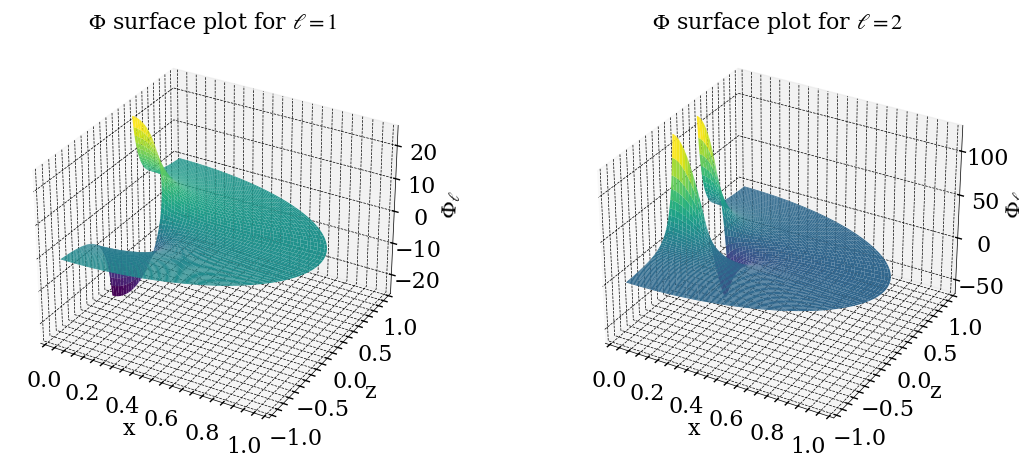

In [8]:
fig, axes = plot_surface_pair(1, 2)
fig.savefig("surface_l1_l2.png")
plt.show()

# Laplace’s Equation in Cylindrical Coordinates (m=0)

For azimuthal symmetry ($\partial_\phi = 0$) in cylindrical coordinates $(\rho, z, \phi)$, the radial part reduces to Bessel’s equation:

$$
\rho^2 \frac{d^2 R}{d\rho^2} + \rho \frac{dR}{d\rho} + (k^2 \rho^2) R = 0
$$

Applying the Frobenius method for $m=0$ gives the regular solution at the origin:

$$
R(\rho) = J_0(k \rho)
$$

- The second solution, $Y_0(k \rho)$, is singular at $\rho = 0$ and is usually discarded.

The **exact solution** we will plot is:

$$
\Phi(\rho, z) = J_0(k \rho) \, \cos(k z)
$$

- This gives a simple pattern with radial Bessel oscillations and axial variation along $z$.

---

# Planned Plots

We will visualize $\Phi(\rho, z)$ in the $\rho z$-plane.
 axis


- **1D plot**: $J_0(k \rho)$ along the radial direction.  
- **Contour and heatmap**: $\Phi(\rho, z)$ in the $(\rho, z)$-plane.  
- **3D surface plot**: $\Phi(\rho, z)$ showing the radial oscillations and symmetry along the axis.  


In [9]:
def plot_bessel_1d(k=1, rho_max=10, Nrho=400, figsize=(7,5)):
    rho = np.linspace(0, rho_max, Nrho)
    
    Phi = j0(k * rho)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(rho, Phi, color="black")
    
    ax.set_title(r"Bessel Function $J_0(k\rho)$")
    ax.set_xlabel(r"$\rho$")
    ax.set_ylabel(r"$J_0(k \rho)$")
    plt.tight_layout()
    
    return fig, ax

In [10]:
def plot_cylindrical_contour_heatmap(k=1, rho_max=5, z_max=2*np.pi, Nrho=300, Nz=300, cmap="viridis"):
    # grid
    rho = np.linspace(0, rho_max, Nrho)
    z = np.linspace(0, z_max, Nz)
    R, Z = np.meshgrid(rho, z)
    
    # potential
    Phi = j0(k * R) * np.cos(k * Z)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"width_ratios": [2, 1]})
    
    # --- Contour ---
    cs = axes[0].contour(R, Z, Phi, levels=20, cmap=cmap)
    axes[0].clabel(cs, inline=True, fontsize=8)
    axes[0].set_title(f"Contour: $\\Phi(\\rho,z)$")
    axes[0].set_xlabel(r"$\rho$")
    axes[0].set_ylabel(r"$z$")
    
    # --- Heatmap ---
    im = axes[1].imshow(Phi.T, extent=[R.min(), R.max(), Z.min(), Z.max()],
                    origin='lower', aspect='equal',
                    cmap=cmap)
    axes[1].set_title(f"Heatmap: $\\Phi(\\rho,z)$")
    axes[1].set_xlabel(r"$\rho$")
    axes[1].set_ylabel(r"$z$")
    
    return fig, axes

In [11]:
def plot_cylindrical_surface(k=1, rho_max=5, z_max=2*np.pi, Nrho=100, Nz=100, cmap="viridis"):
    # grid
    rho = np.linspace(0, rho_max, Nrho)
    z = np.linspace(0, z_max, Nz)
    R, Z = np.meshgrid(rho, z)
    
    # potential
    Phi = j0(k * R) * np.cos(k * Z)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    
    ax.plot_surface(R, Z, Phi, rstride=4, cstride=4, linewidth=0, cmap=cmap)
    ax.set_title(rf"$\Phi(\rho,z)$ surface for $k={k}$")
    ax.set_xlabel(r"$\rho$")
    ax.set_ylabel(r"$z$")
    ax.set_zlabel(r"$\Phi$")
    ax.view_init(elev=60, azim=165)
    
    fig.tight_layout()
    return fig, ax

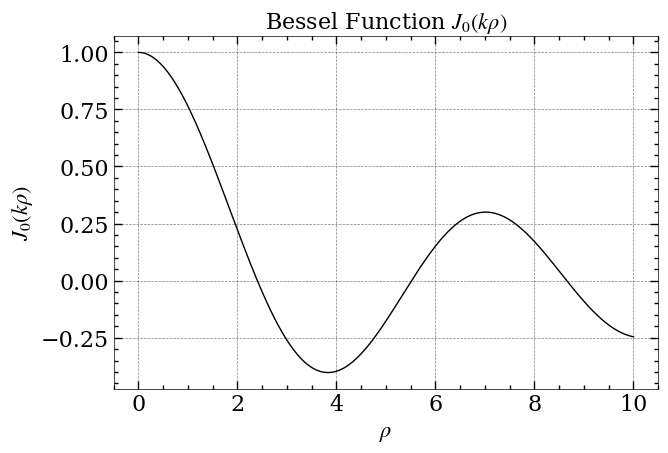

In [12]:
fig, ax = plot_bessel_1d(k=1)
fig.savefig("j0.png")
plt.show()

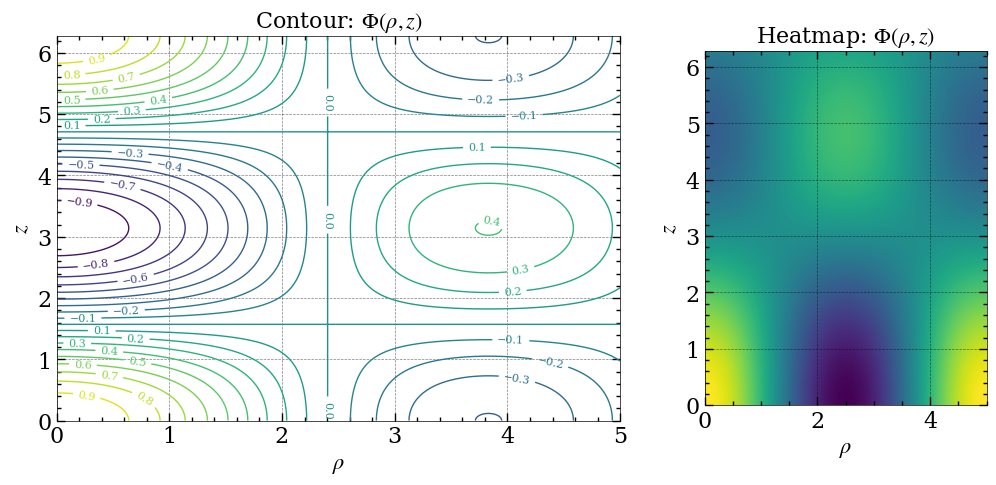

In [13]:
fig, axes = plot_cylindrical_contour_heatmap(k=1)
fig.savefig("contours - k1.png")
plt.show()

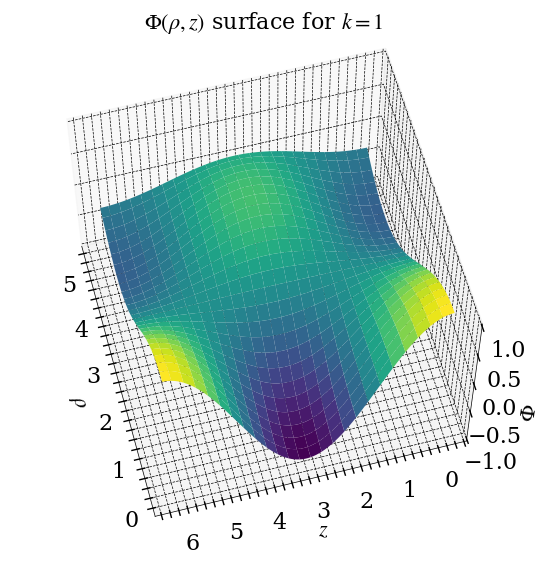

In [14]:
fig, ax = plot_cylindrical_surface(k=1)
fig.savefig("surface_k1.png")
plt.show()